# Análisis de datos - Trabajo final integrador

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQATNC-EBwF-LIbDVv_L0gkP2V6oKQzah5GRg&usqp=CAU"/>

Se propone realizar el ciclo completo del desarrollo de un modelo de aprendizaje automático supervisado.

Trabajaremos con un [dataset de Kaggle con datos de por distintas estaciones metereológicas de Australia](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv).

El objetivo es predecir si lloverá o no al día siguiente (variable *RainTomorrow*), en función datos metereológicos del día actual.


## Enunciado

- Descargar el [dataset de kaggle](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv)

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

### 2. Esquema de validación de resultados

- Los pasos siguientes comprenden las etapas de preparación de datos y evaluación de resultados. 
- Para ello, se debe particionar el dataset en entrenamiento y validación.

### 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría?. Ensayar distintas técnicas y analizar los resultados. 
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo númerico/categórico.
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada?

- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia?. Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

### 4. Entrenamiento de modelos

- Recurriendo a los modelos que conozca, defina una lista de modelos candidatos a entrenar (puede ser el mismo tipo de clasificador con distintos hiperparámetros). Nota: no se contemplará el desempeño del modelo elegido, sino las conclusiones que puedan establecerse a partir de la preparación previa de los datos.

- Ensaye distintas cadenas de procesamiento con las técnicas consideradas en la sección 3 (por ejemplo, distintas técnicas de imputación, selección de variables de entrada, codificación de variables categóricas, transformación, etc.).

### 5. Evaluación de resultados y conclusiones

- ¿Qué puede concluir acerca de los modelos y preparaciones de datos ensayadas? Tener en cuenta como cada preparación afecta a los distintos modelos.

### 6. Presentación de resultados

- Elabore un informe de dos o tres páginas describiendo el procedimiento realizado y las conclusiones importantes indicando la ruta del código fuente en git.


## Desarrollo

### 1. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
  - Realizar los siguientes análisis por tipo de variable.
    - Numéricas: 
      - Obtener conclusiones acerca de la distribución de los datos.
    - Categóricas
        - Obtener conclusiones acerca de cardinalidad, representación de cada categoría, etc.
    - Compuestas/otros. ¿Cómo pueden tratarse para utilizarlas en el problema elegido?
- Variables de salida:
  - ¿Están balanceadas las clases?
  - ¿Qué técnicas consideraría para codificar la variable de salida? Justificar.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns; sns.set()


#### Lectura del dataset

In [2]:
dataset = pd.read_csv("weatherAUS.csv")

#### Visualizacion de las primeras 5 filas

In [3]:
dataset.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Resumen de 5 números
A través de '.describe' se muestra un resumen estadístico del dataset incluyendo el de los 5 números (valor minimo, el 1er cuartil, la mediana, el 3er cuartil y el valor máximo)

In [4]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


#### Identificación de los tipos de datos e identificación de entradas y salidas

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Del resumen del dataset se desprenden las siguiente conclusiones:
- El dataset cuenta con 145460 muestras, 22 features y una salida ("Rain Tomorrow").
- Solo las feature 'Date' y 'Location' estan completas por lo que es necesario hacer ingenieria de features, estudiando cada caso.
- Detectamos 6 variables categóricas:
  - Date: Fecha de observación codificada en Año-Mes-Dia
  - Location: Nombre propio de la ciudad
  - WindGustDir: Dirección de la rafaga de viento más fuerte del día, codificado con los puntos cardinales.
  - WindDir9am: Dirección del viento a las 9 am, codificado con los puntos cardinales.
  - WindDir3pm: Dirección del viento a las 3 pm, codificado con los puntos cardinales.
  - RainToday: Indicación booleana de Si/No
- Detectamos 16 variables numéricas tipo _flotante de 64 bits_:
  - MinTemp: Temperatura minima en grados celsius
  - MaxTemp: Temperatura máxima en grados celsius
  - Rainfall: Lluvia caida durante el dia en mm
  - Evaporation: Evaporacion de la bandeja (Pan evaporation*).
  - Sunshine: Número de horas de sol durante el día.
  - WindGustSpeed: Velocidad de la rafaga de viento más fuerte del dia en km/h.
  - WindSpeed9am: Velocidad del viento promedio durante las 8:50 am y las 9 am en km/h.
  - WindSpeed3pm: Velocidad del viento promedio durante las 2:50 pm y las 3 pm en km/h.
  - Humidity9am: Humedad en % a las 9 am.
  - Humidity3pm: Humedad en % a las 3 pm.
  - Pressure9am: Presión atmosférica a las 9 am en hpa.
  - Pressure3pm: Presión atmosférica a las 3 pm en hpa.
  - Cloud9am: Fracción del cielo obstruido a las 9 am, medido en oktas* *.
  - Cloud3pm: Fracción del cielo obstruido a las 3 pm, medido en oktas.
  - Temp9am: Temperatura a las 9 am en grados celsius.
  - Temp3pm: Temperatura a las 3 pm en grados celsius.
- Una salida tipo categórica:
  - RainTomorrow: Indicación booleana de Si/No
  
 
_*Pan-evaporation: sistema de medición del tiempo que integra varias condiciones climáticas que incluyen lluvia, humedad, radiación solar, viento, temperatura y dispersión de la sequía_

_* *La medicion en oktas va de 0 a 8 ya que se indican cuantos octavos del cielo estan cubierto de nuves._

In [6]:
categoricas = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
numericas = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', \
             'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', \
             'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
salida = ['RainTomorrow']

##### Calculo de datos faltantes

In [7]:
def cant_null(dta):
    """
    Esta función calcula la cantidad numerica y porcentual de
    datos faltantes de cada columna del dataset de entrada.
    """
    cant_null = []
    porc_null = []
    for feature in dta.columns:
        cant_null.append(sum(dta[feature].isnull()))
        porc_null.append(sum(dta[feature].isnull())*100/dta.shape[0])
    return cant_null, porc_null 

cant_null, porc_null = cant_null(dataset)
orden =  np.argsort(porc_null)[::-1]

print("Datos Faltantes:")
for i in range(len(orden)):
    if cant_null[orden[i]] != 0:
        print(f"{dataset.columns[orden[i]]}:\tDatos nulos: {cant_null[orden[i]]}\tEn%: {porc_null[orden[i]]}")

Datos Faltantes:
Sunshine:	Datos nulos: 69835	En%: 48.00976213391998
Evaporation:	Datos nulos: 62790	En%: 43.1665062560154
Cloud3pm:	Datos nulos: 59358	En%: 40.80709473394748
Cloud9am:	Datos nulos: 55888	En%: 38.42155919153032
Pressure9am:	Datos nulos: 15065	En%: 10.356799120033
Pressure3pm:	Datos nulos: 15028	En%: 10.331362573903478
WindDir9am:	Datos nulos: 10566	En%: 7.263852605527292
WindGustDir:	Datos nulos: 10326	En%: 7.09885879279527
WindGustSpeed:	Datos nulos: 10263	En%: 7.055547916953114
Humidity3pm:	Datos nulos: 4507	En%: 3.09844630826344
WindDir3pm:	Datos nulos: 4228	En%: 2.906641000962464
Temp3pm:	Datos nulos: 3609	En%: 2.4810944589577892
RainTomorrow:	Datos nulos: 3267	En%: 2.245978275814657
RainToday:	Datos nulos: 3261	En%: 2.241853430496356
Rainfall:	Datos nulos: 3261	En%: 2.241853430496356
WindSpeed3pm:	Datos nulos: 3062	En%: 2.105046060772721
Humidity9am:	Datos nulos: 2654	En%: 1.8245565791282827
WindSpeed9am:	Datos nulos: 1767	En%: 1.214766946239516
Temp9am:	Datos nulo

De los resultados obtenidos resalto dos cosas que considero de gran importancia. Primero, que tenemos features con una gran canidad de datos faltantes, y en segundo lugar, tenemos 3267 muestras que no contienen datos de salida.

Para el caso de los features analizaremos cada uno y decidiremos luego de cada analisis el camino a seguir.
Para las muestras sin salidas se deciden eliminarlas del dataset ya que no me aportaran información para el entrenamiento del modelo.


### Variables de entradas
#### Análisis de variables numéricas

Para el analisis de distribución analizaremos en grupos de variables que creo que podría ser interesante comparar en una primer instancia. Agruparemos los 16 features en 4 grupos, el primero contendra las variables de temperaturas, el segundo agrupará las variables de humedad y presion. Un tercer grupo contendrá las variables de velocidad de viento y evaporacion, y finalmente un cuarto grupo agruparemos las variables de cobertura del cielo, horas de sol diario y lluvia caida.

In [96]:
def outlier_diagnostic_plots(df, variable):
    for i, var in enumerate(variable):
        fig,axes = plt.subplots(1,2,figsize=(15,5))

        axes[0].hist(df[var], bins=50)
        axes[0].set_title('Histograma')

        # boxplot    
        sns.boxplot(y=df[var],ax=axes[1])
        axes[1].set_title('Box&Whiskers')

In [97]:
temperatures = ['Temp9am', 'MinTemp', 'Temp3pm', 'MaxTemp']
hum_press = ['Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
wind = ['WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Evaporation']
sky = ['Cloud9am', 'Cloud3pm', 'Rainfall', 'Sunshine' ]

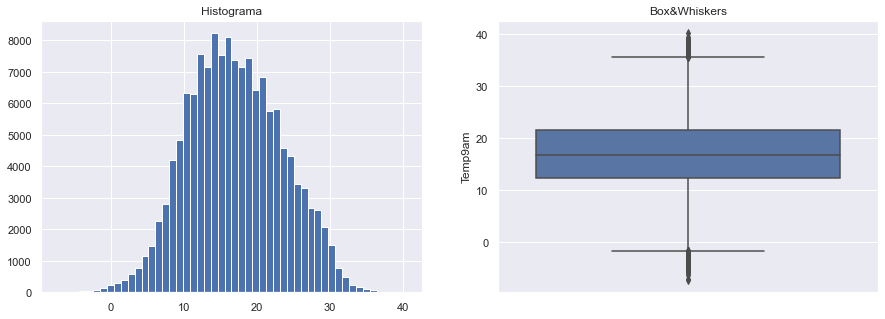

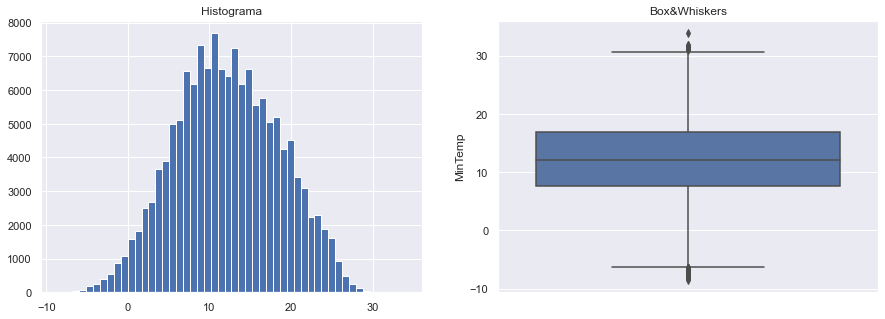

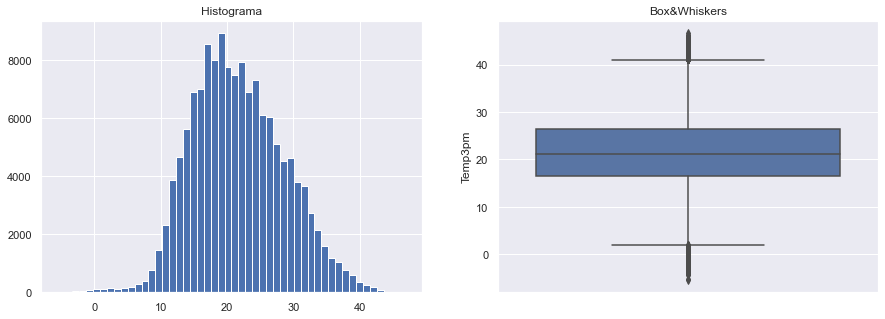

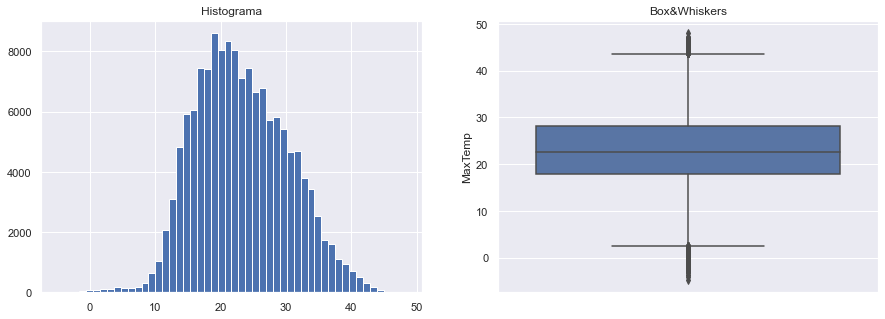

In [98]:
outlier_diagnostic_plots(dataset, temperatures)

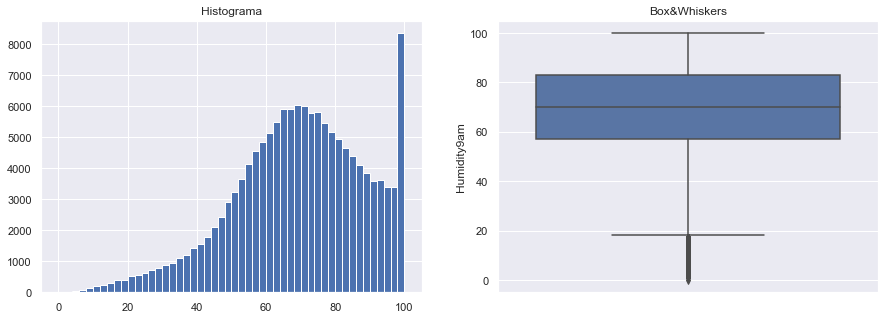

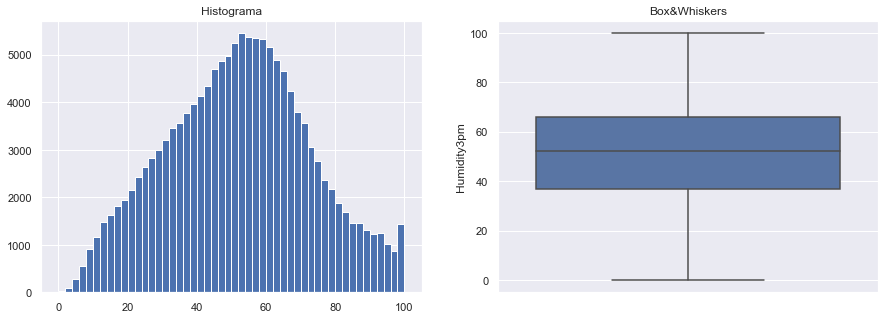

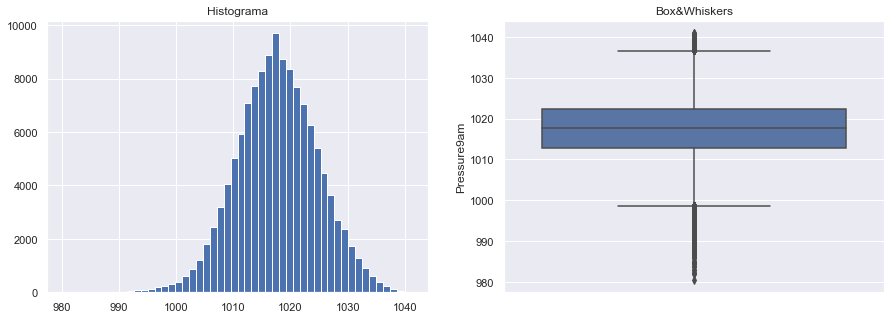

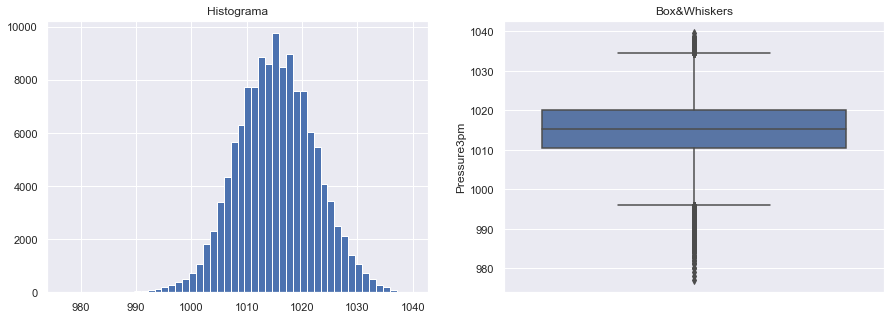

In [99]:
outlier_diagnostic_plots(dataset, hum_press)

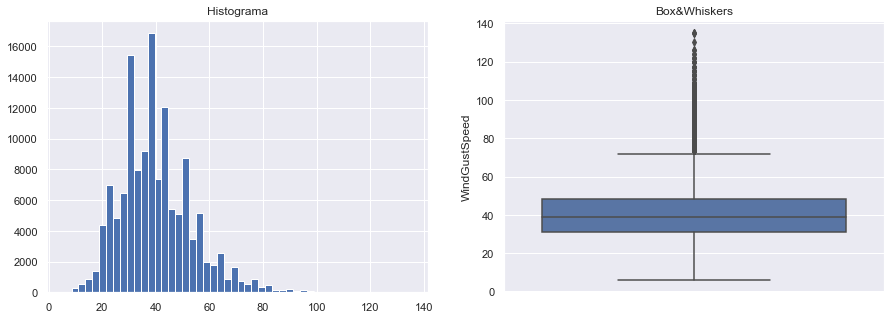

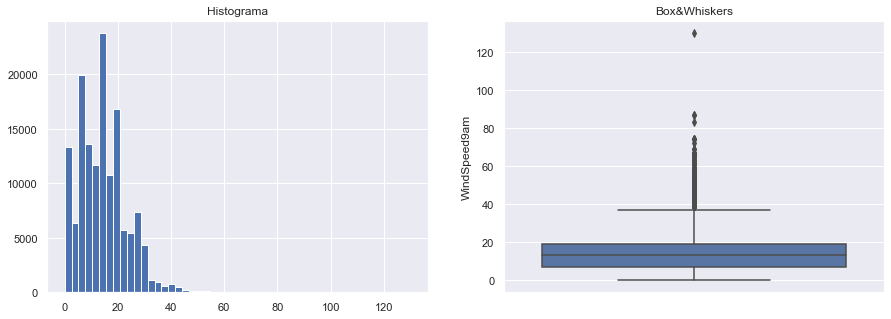

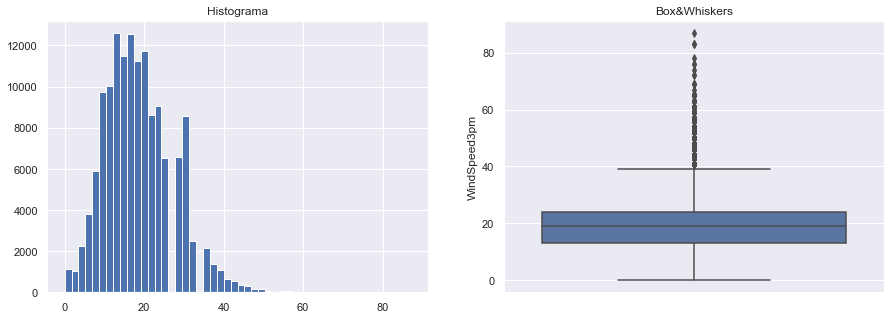

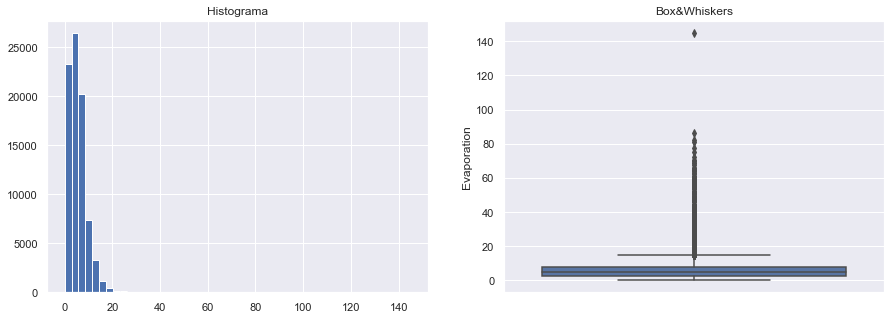

In [100]:
outlier_diagnostic_plots(dataset, wind)

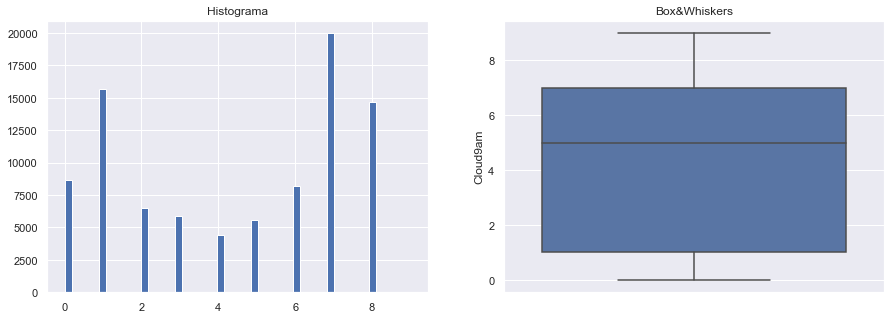

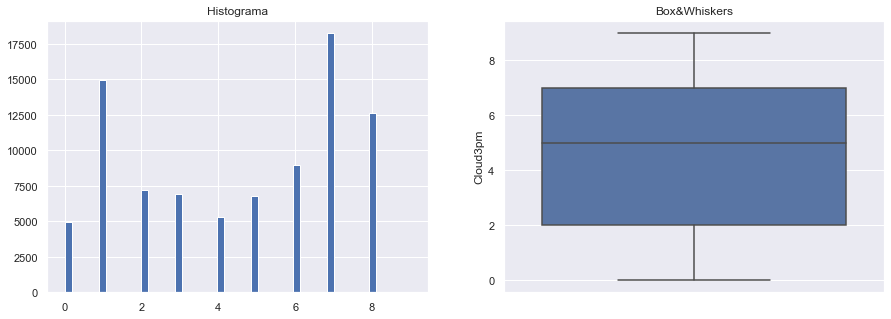

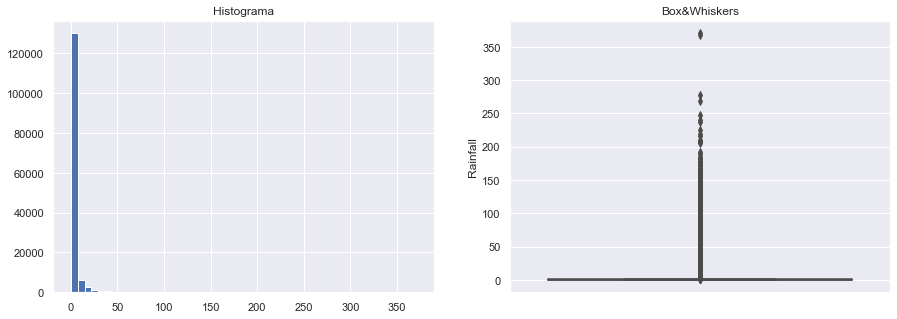

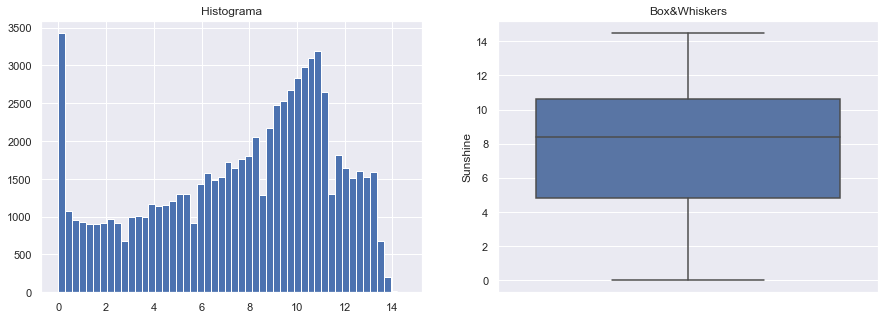

In [101]:
outlier_diagnostic_plots(dataset, sky)